In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
np.random.seed(0)

In [11]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)

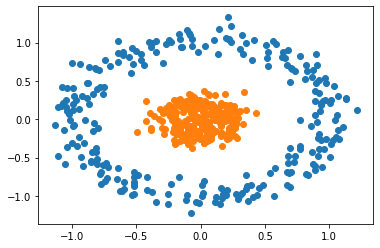

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [15]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [17]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 195us/step - loss: 0.7343 - accuracy: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 42us/step - loss: 0.6936 - accuracy: 0.4840
Epoch 3/100
500/500 [==============================] - 0s 38us/step - loss: 0.6931 - accuracy: 0.6300
Epoch 4/100
500/500 [==============================] - 0s 38us/step - loss: 0.6927 - accuracy: 0.5700
Epoch 5/100
500/500 [==============================] - 0s 42us/step - loss: 0.6923 - accuracy: 0.6300
Epoch 6/100
500/500 [==============================] - 0s 38us/step - loss: 0.6920 - accuracy: 0.4000
Epoch 7/100
500/500 [==============================] - 0s 40us/step - loss: 0.6919 - accuracy: 0.6520
Epoch 8/100
500/500 [==============================] - 0s 31us/step - loss: 0.6908 - accuracy: 0.6100
Epoch 9/100
500/500 [==============================] - 0s 34us/step - loss: 0.6892 - accuracy: 0.4180
Epoch 10/100
500/500 [==============================] - 0s 35us/step - loss: 0.68

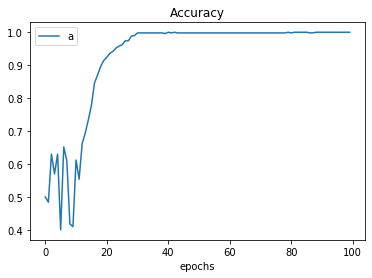

In [18]:
plt.plot(h.history['accuracy'])
plt.xlabel('epochs')
plt.title('Accuracy')
plt.legend('accuracy')

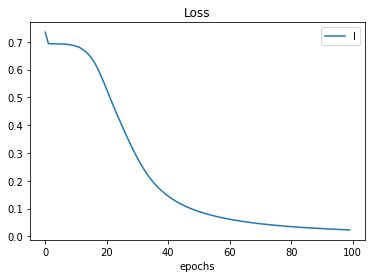

In [19]:
plt.plot(h.history['loss'])
plt.xlabel('epochs')
plt.title('Loss')
plt.legend('loss')

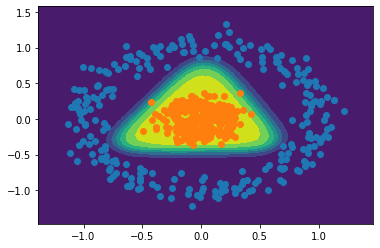

In [21]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Prediction is:  [[0.98435783]]


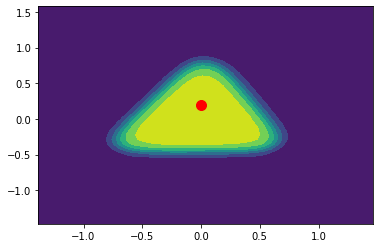

In [27]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0.2
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)